In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

In [2]:
f = lambda x, a, r: np.array(
    [
    r * x[0] + a*x[1] - x[0]**3,
    r * x[1] - a*x[0] - x[1]**3
])


xf1 = lambda a, r: np.sqrt(3*r + np.sqrt(r**2 - 8*a**2) + np.sqrt(8*a**2 + 2*r*(r - np.sqrt(r**2 - 8*a**2) )))/2
xf2 = lambda a, r: np.sqrt(3*r + np.sqrt(r**2 - 8*a**2) - np.sqrt(8*a**2 + 2*r*(r - np.sqrt(r**2 - 8*a**2) )))/2
xf3 = lambda a, r: np.sqrt(3*r - np.sqrt(r**2 - 8*a**2) + np.sqrt(8*a**2 + 2*r*(r + np.sqrt(r**2 - 8*a**2) )))/2
xf4 = lambda a, r: np.sqrt(3*r - np.sqrt(r**2 - 8*a**2) - np.sqrt(8*a**2 + 2*r*(r + np.sqrt(r**2 - 8*a**2) )))/2


xf = [xf1, xf2, xf3, xf4]
yf = lambda a, r, xf: xf(a, r)*(xf(a, r)**2 - r)/a if a !=0 else -xf(a, r)


l1 = lambda x, y, a, r : (2*r - 3*(x**2 + y**2) + np.sqrt( 9*(x**2 - y**2)**2 - 4*a**2+0j ))
l2 = lambda x, y, a, r : (2*r - 3*(x**2 + y**2) - np.sqrt( 9*(x**2 - y**2)**2 - 4*a**2+0j ))

def Cr (x1, x2, a, r): 
    C = np.logical_and(l1(x1, x2, a, r).real>0, l1(x1, x2, a, r).real>0)
    return np.ma.masked_where(C==0, C)

def Ci (x1, x2, a, r):
    C = l1(x1, x2, a, r).imag
    return np.ma.masked_where(C==0, C)

/tmp/ipykernel_60600/2227079827.py:8: RuntimeWarning: invalid value encountered in sqrt
  xf1 = lambda a, r: np.sqrt(3*r + np.sqrt(r**2 - 8*a**2) + np.sqrt(8*a**2 + 2*r*(r - np.sqrt(r**2 - 8*a**2) )))/2
/tmp/ipykernel_60600/2227079827.py:9: RuntimeWarning: invalid value encountered in sqrt
  xf2 = lambda a, r: np.sqrt(3*r + np.sqrt(r**2 - 8*a**2) - np.sqrt(8*a**2 + 2*r*(r - np.sqrt(r**2 - 8*a**2) )))/2
/tmp/ipykernel_60600/2227079827.py:10: RuntimeWarning: invalid value encountered in sqrt
  xf3 = lambda a, r: np.sqrt(3*r - np.sqrt(r**2 - 8*a**2) + np.sqrt(8*a**2 + 2*r*(r + np.sqrt(r**2 - 8*a**2) )))/2
/tmp/ipykernel_60600/2227079827.py:11: RuntimeWarning: invalid value encountered in sqrt
  xf4 = lambda a, r: np.sqrt(3*r - np.sqrt(r**2 - 8*a**2) - np.sqrt(8*a**2 + 2*r*(r + np.sqrt(r**2 - 8*a**2) )))/2


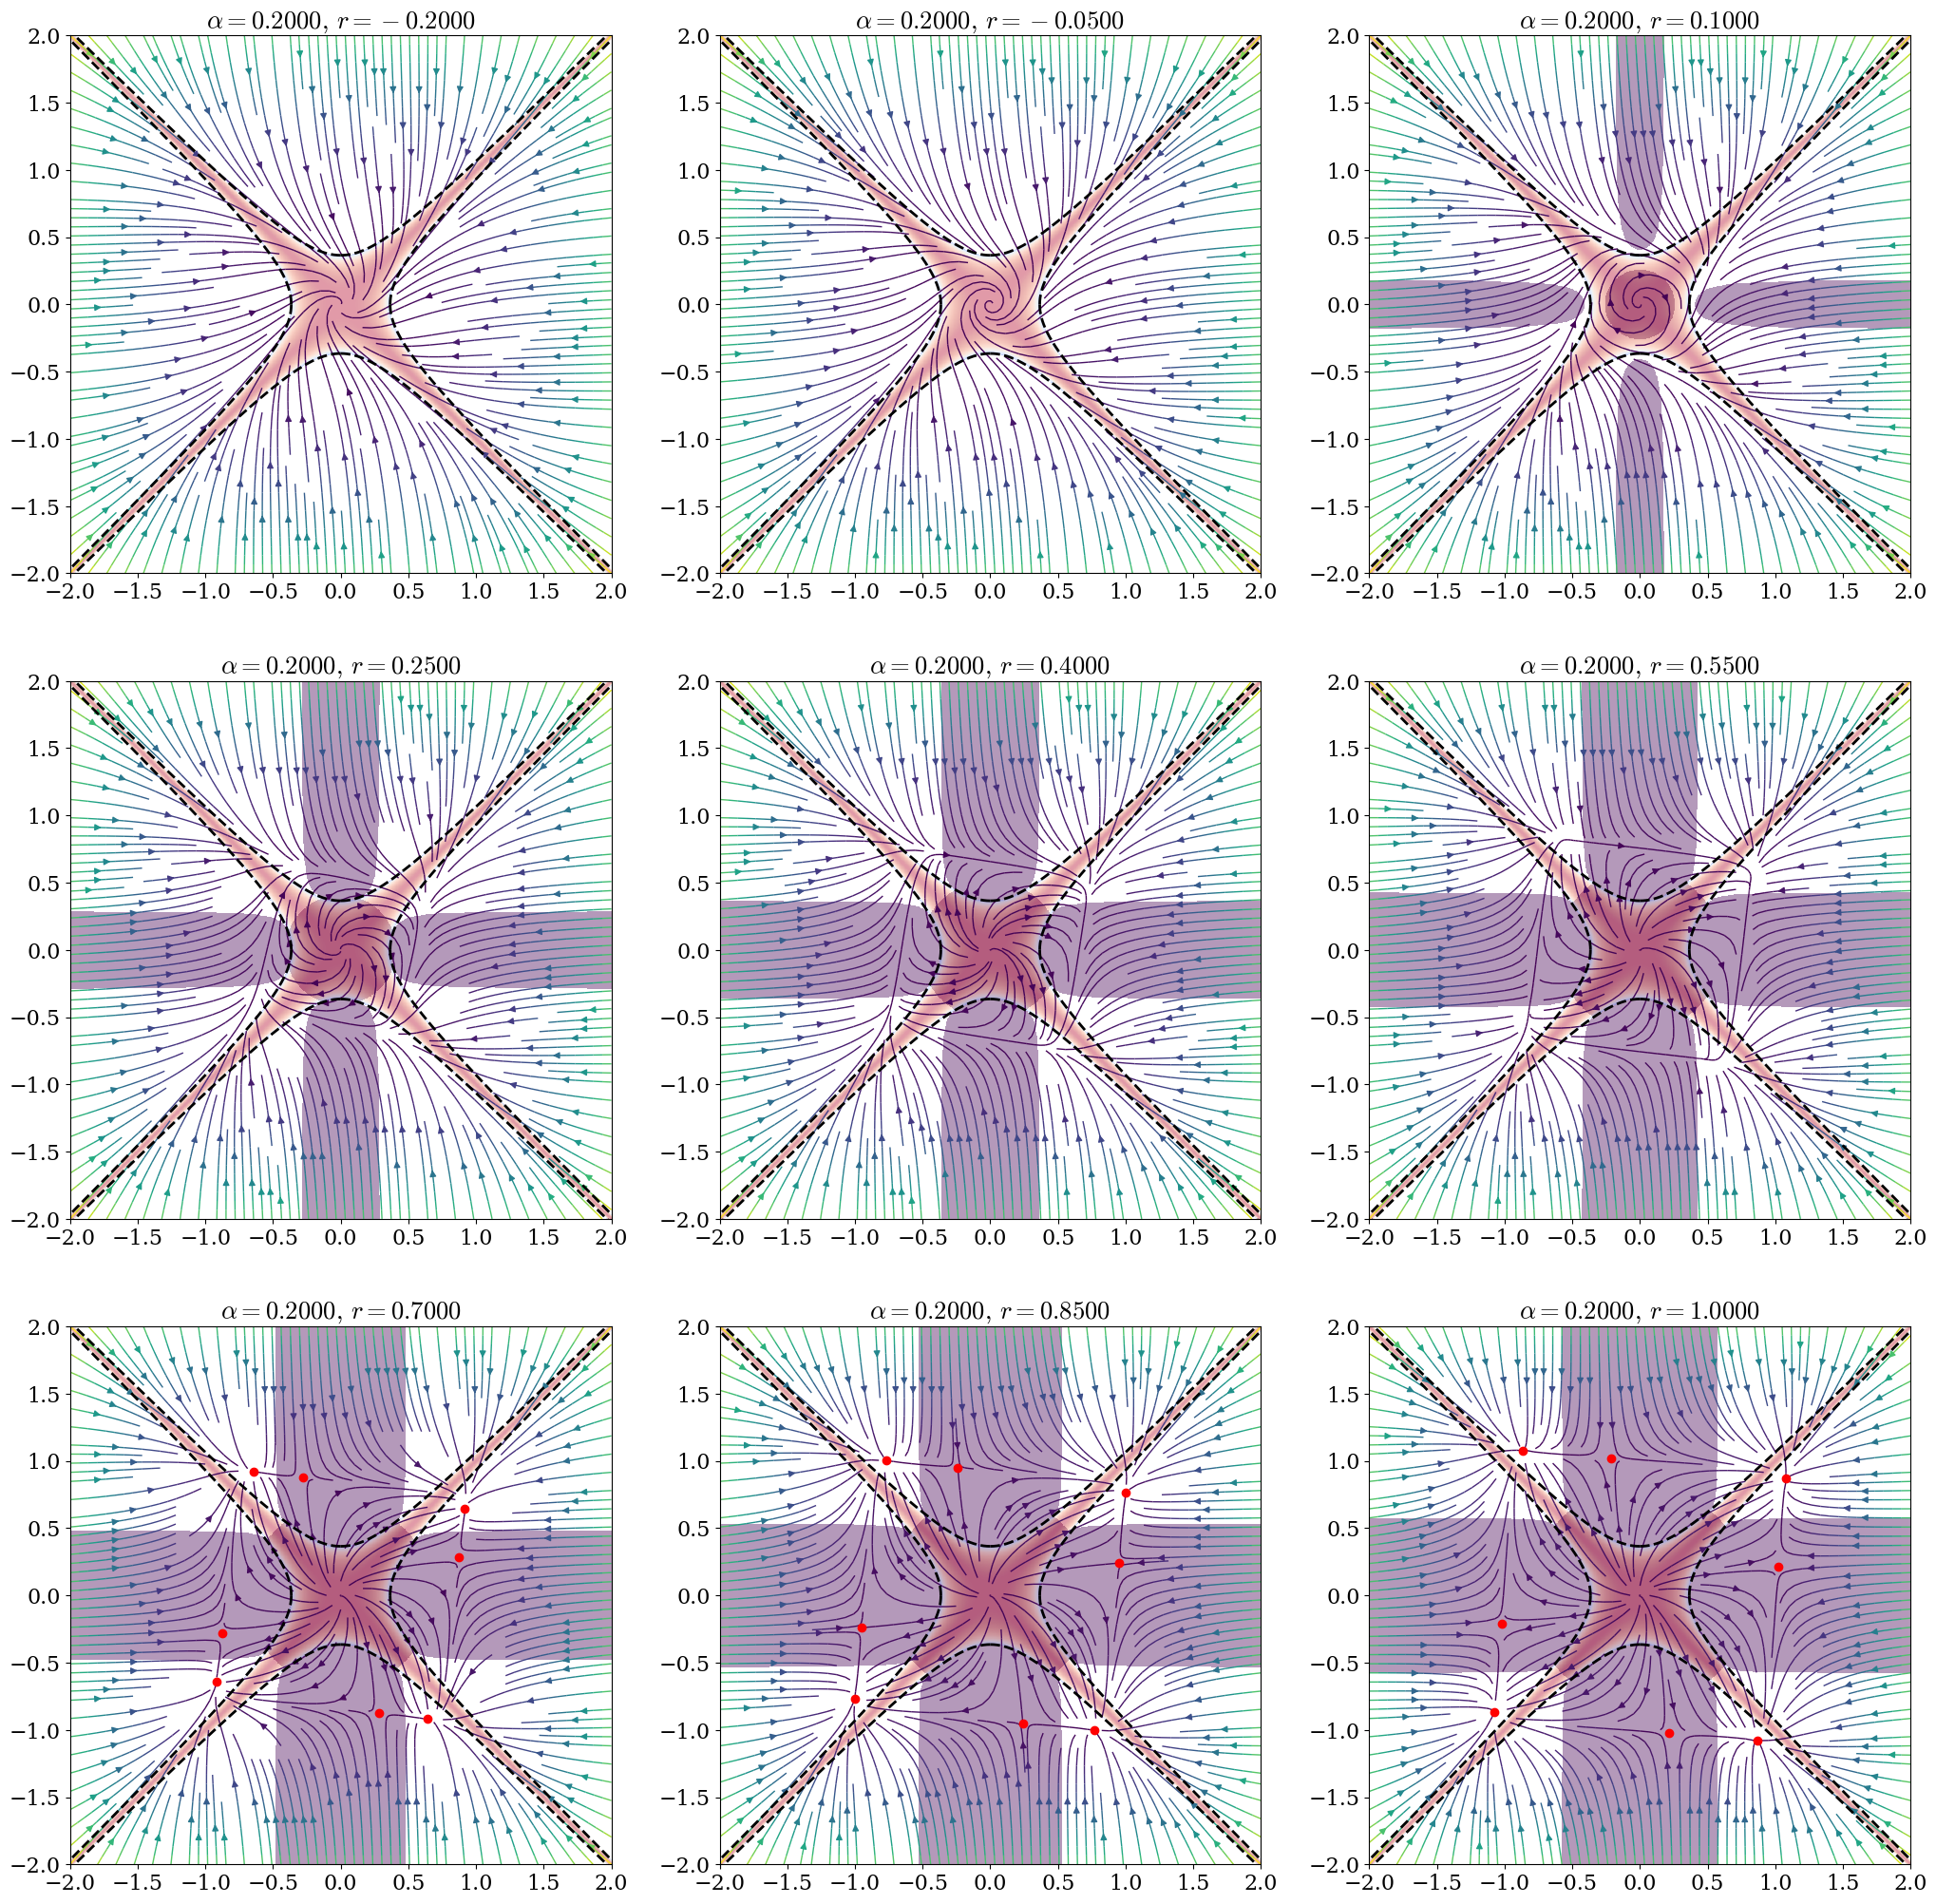

In [24]:
n = 1000
l = np.array([-1, 1])*2
x = np.linspace([l[0]]*2, [l[1]]*2, n, axis=1)
x = np.array(np.meshgrid(*x))


m = 3
aa = np.linspace(.0, 1, m**2)
fig, ax = plt.subplots(m, m, figsize=(25, 25))

a = .2
rr = np.linspace(-.2, 1, m**2)
for n, r in enumerate(rr):


# r = 1.
# aa = np.linspace(.01, .45, m**2)
# aa[-1] = 1.1
# for n, a in enumerate(aa):

    y = f(x, a, r)
    l = np.sqrt(np.einsum('ijk,ijk->jk', y, y))

    ax[n//m, n%m].streamplot(*x, *y, color=l, density=2., linewidth=1)

    ax[n//m, n%m].pcolormesh(*x, Cr(x[0], x[1], a, r), alpha=.4)   
    ax[n//m, n%m].pcolormesh(*x, Ci(x[0], x[1], a, r), alpha=.4, cmap='coolwarm')

    x0 = [(xf0(a, r), yf(a, r, xf0)) for xf0 in xf]
    [ax[n//m, n%m].plot(x[0], x[1], 'ro', label=str(i)) for i, x in enumerate(x0)]
    x0 = [(-xf0(a, r), -yf(a, r, xf0)) for xf0 in xf]
    [ax[n//m, n%m].plot(x[0], x[1], 'ro', label=str(4+i)) for i, x in enumerate(x0)]

    M = 2001
    x0 = np.linspace(0, 2, M)
    y0 = np.sqrt(x0**2 + 2/3 * a)
    for s1 in [1, -1]:
        for s2 in [1, -1]:
            for r1,r2 in [[x0, y0], [y0, x0]]:
                ax[n//m, n%m].plot(s1*r1, s2*r2, 'k--', lw=2)

    ax[n//m, n%m].set_title('$\\alpha = {:.4f}, \, r = {:.4f}$'.format(a, r))
    ax[n//m, n%m].set_xlim(-2, 2)
    ax[n//m, n%m].set_ylim(-2, 2)
    
    
plt.show()